In [1]:
import matplotlib.pyplot as plt

def eda(Xt, Yt, Xtest, Ytest):
    print(Xt.shape, Yt.shape)
    print(Xtest.shape, Ytest.shape)

    print(Xt.dtype, Yt.dtype)
    print(Xtest.dtype, Ytest.dtype)

    plt.figure(figsize=(7,2))
    plt.subplot(121)
    plt.hist(Yt)
    plt.subplot(122)
    plt.hist(Ytest)
    plt.show()

    print('clase, Ytest/Yt, Nt, Ntest')
    for i in range(5):
        strain, stest = (Yt == i).sum(), (Ytest == i).sum()
        p = round(stest/strain, 4)
        print(i, p, strain, stest)

    print()
    print('statistics')
    print(Xt.mean(), Xt.std(), Xt.min(), Xt.max())
    print(Xtest.mean(), Xtest.std(), Xtest.min(), Xtest.max())

import sklearn as sk
from mlxtend.evaluate import accuracy_score

def evaluation(classifier, Ytest, Ypred, tree=False): 
    std_acc = accuracy_score(Ytest, Ypred)
    avg_acc = accuracy_score(Ytest, Ypred, method='average')
    bin_acc0 = accuracy_score(Ytest, Ypred, method='binary', pos_label=0)
    bin_acc1 = accuracy_score(Ytest, Ypred, method='binary', pos_label=1)
    bin_acc2 = accuracy_score(Ytest, Ypred, method='binary', pos_label=2)
    bin_acc3 = accuracy_score(Ytest, Ypred, method='binary', pos_label=3)
    bin_acc4 = accuracy_score(Ytest, Ypred, method='binary', pos_label=4)
    class_precision = sk.metrics.precision_score (Ytest, Ypred, average = None)
    recall = sk.metrics.recall_score(Ytest, Ypred, average= None)
    f1macro = sk.metrics.f1_score(Ytest, Ypred, average="macro")

    print(f'f1-macro:                   {f1macro:.4f}')
    print(f'Standard accuracy:          {std_acc:.4f}')
    print(f'Average per-class accuracy: {avg_acc:.4f}')
    print ()
    print(f'Normal accuracy: {bin_acc0:.4f}')
    print(f'DoS accuracy:    {bin_acc1:.4f}')
    print(f'Probe accuracy:  {bin_acc2:.4f}')
    print(f'R2L accuracy:    {bin_acc3:.4f}')
    print(f'U2R accuracy:    {bin_acc4:.4f}')
    print()
    print(f"Normal Precision: {class_precision[0]:.4f}")
    print(f"DoS Precision:    {class_precision[1]:.4f}")
    print(f"Probe Precision:  {class_precision[2]:.4f}")
    print(f"R2L Precision:    {class_precision[3]:.4f}")
    print(f"U2R Precision:    {class_precision[4]:.4f}")
    print()
    print(f"Normal Recall: {recall[0]:.4f}")
    print(f"DoS Recall:    {recall[1]:.4f}")
    print(f"Probe Recall:  {recall[2]:.4f}")
    print(f"R2L Recall:    {recall[3]:.4f}")
    print(f"U2R Recall:    {recall[4]:.4f}")

    confusion_matrix = sk.metrics.confusion_matrix(Ytest, Ypred)
    cm_display = sk.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.show()
    
    if tree:    
        sk.tree.plot_tree(classifier, fontsize=1)
    return None 

In [2]:
# Estudiar el conjunto reducido: su distribucion respecto a la original. 
# ¿hay ejemplos repetidos? 
# como crece con las iteraciones. 
# ¿cunado congerve y de que dpeende? "
# ¿cual es el minimo numero de ejemplos necesario para obtener acc > acc0? 

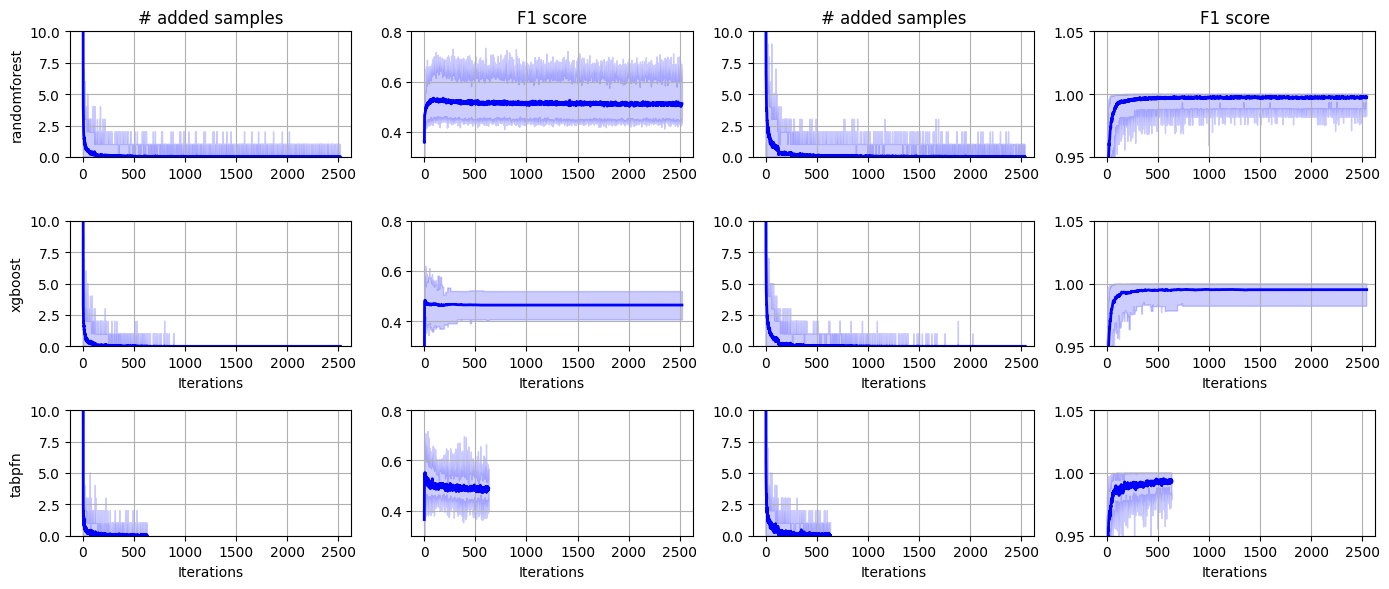

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_band(X):
    # X: matriz de forma (N, M), cada columna es un vector
    n = np.arange(1,X.shape[0]+1)
    media = np.mean(X, axis=1)
    p05 = np.percentile(X, 0, axis=1)
    p95 = np.percentile(X, 100, axis=1)
    plt.fill_between(n, p05, p95, alpha=0.2, label='90% (5–95%)', color='blue')
    plt.plot(n, media, label='Media', color='blue', linewidth=2)

def plot_dnsamples_f1(i, NS, F1, clf):
    dNS = NS[1:, :] - NS[:-1, :]
    plt.subplot(3,4,2*i+1)
    plot_band(dNS)
    plt.xlabel("Iterations") if i > 1 else None
    plt.ylabel(clf) if i%2==0 else None
    plt.title("# added samples") if i < 2 else None
    plt.grid("on")
    plt.xlim([-125,2500+125]) 
    plt.ylim([0,10]) 
    dt = 1
    #plt.xlim([0,25])
    #eps = [x for x in range(1,len(NS)+1,126*dt)]
    #plt.xticks(eps, [x for x in range(0,len(eps), dt)]) 

    plt.subplot(3,4,2*i+2)
    plot_band(F1)
    plt.xlabel("Iterations") if i > 1 else None
    plt.title("F1 score")  if i < 2 else None
    plt.grid("on")
    plt.xlim([-125,2500+125])
    plt.ylim([0.3,0.8]) if i%2==0 else plt.ylim([0.95,1.05])
    plt.tight_layout()

clfs = ["randomforest","xgboost", "tabpfn"] #["randomforest", ]
dsnames = ["original", "resampled"]  
plt.figure(figsize=(2*7, 3*2))
for i, (clf, dsname) in enumerate(itertools.product(clfs, dsnames)):
    data = np.load(f"Exp2_More_Epochs/normal_attacks_{dsname}/{clf}_nsamples_f1scores.npz")
    if i%2 == 0: #original
        plot_dnsamples_f1(i, data["NS"][:, :].T, data["F1"][:, :].T, clf) 
    else: #resampled
        plot_dnsamples_f1(i, data["NS"].T, data["F1"].T, clf)
plt.tight_layout()
plt.savefig(f"figures/addedsamplesVSiterations.svg", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
import pickle
from collections import defaultdict

def encontrar_vectores_repetidos(vectores):
    vectores_como_tuplas = [tuple(v) for v in vectores]
    grupos_de_repetidos = defaultdict(list)
    for idx, vector_tupla in enumerate(vectores_como_tuplas):
        grupos_de_repetidos[vector_tupla].append(idx)
    vectores_repetidos = {k: v for k, v in grupos_de_repetidos.items() if len(v) > 1}
    resultado = {}
    for indices in vectores_repetidos.values():
        primer_indice = indices[0]
        resultado[primer_indice] = indices
    return resultado

for dsname in ["normal_attacks_original", "normal_attacks_resampled"]:  #
    print()
    print(f"Dataset: {dsname}")
    outdir = f"Exp2_More_Epochs/{dsname}/"
    for clflabel in ["randomforest", "xgboost", "tabpfn"]:
        print(f"Classifier: {clflabel}")
        with open(outdir + f"{clflabel}_datasets.pkl", "rb") as f:
            datasets = pickle.load(f)
        r = []
        for xr, yr in datasets:
            repetidos = encontrar_vectores_repetidos(xr)
            for idx_original, todos_idx in repetidos.items():
                print(f"El vector {idx_original} se repite en las posiciones: {todos_idx}")
            r.append(len([len(repetidos[k]) for k in repetidos.keys()])/xr.shape[0])
        r = np.array(r)
        print(np.where(r > 0))
        print(r.mean()*100)
        #print(xr.shape)
        #eda(xr, yr, Xt, Yt)

# Solamente en XGboost resultan conjunto reducidos con ejemplos duplicados. Y son muy pocos duplicados, alrededor de 0.005% de los ejemplos son duplicados. 
# En el caso de RandomForest y TabPFN no se repiten ejemplos en el conjunto reducido en ninguno de los 100 entrenamientos. 


Dataset: normal_attacks_original
Classifier: randomforest
(array([], dtype=int64),)
0.0
Classifier: xgboost
El vector 1 se repite en las posiciones: [1, 278]
El vector 2 se repite en las posiciones: [2, 215]
El vector 2 se repite en las posiciones: [2, 353]
El vector 4 se repite en las posiciones: [4, 12]
(array([41, 42, 55, 81]),)
0.0041427598395751405
Classifier: tabpfn
(array([], dtype=int64),)
0.0

Dataset: normal_attacks_resampled
Classifier: randomforest
(array([], dtype=int64),)
0.0
Classifier: xgboost
El vector 3 se repite en las posiciones: [3, 51]
El vector 4 se repite en las posiciones: [4, 197]
El vector 1 se repite en las posiciones: [1, 300]
El vector 1 se repite en las posiciones: [1, 413]
El vector 1 se repite en las posiciones: [1, 241]
El vector 1 se repite en las posiciones: [1, 182]
El vector 1 se repite en las posiciones: [1, 367]
(array([ 1, 18, 27, 30, 53, 78, 80]),)
0.005828997709995784
Classifier: tabpfn
(array([], dtype=int64),)
0.0


In [4]:
repetidos

{}